In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
marks_df = pd.read_csv('student_scores.csv')

In [3]:
marks_df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


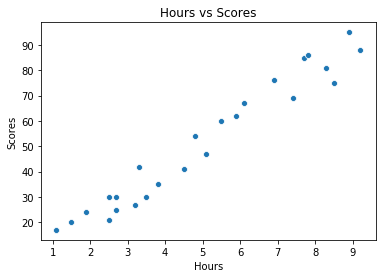

In [6]:
sns.scatterplot(x=marks_df['Hours'],y=marks_df['Scores'])
plt.title('Hours vs Scores')
plt.show()

The scatter plot of Hours vs Scores clearly indicates the linear relationship between Hours and Scores.

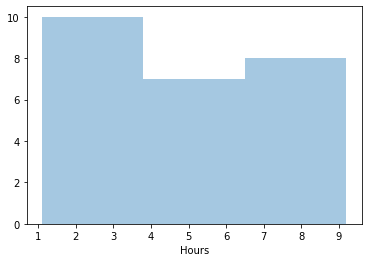

In [12]:
sns.distplot(marks_df['Hours'],kde = False)
plt.show()

The hours of study range from 1. to 9.2 hours.

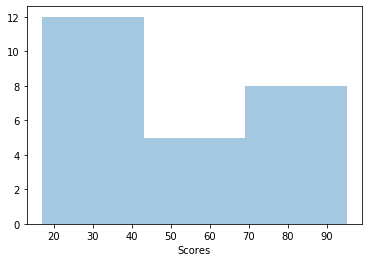

In [13]:
sns.distplot(marks_df['Scores'],kde = False)
plt.show()

The Scores percentage range from 17% to 95%.

In [18]:
import statsmodels.api as sm

In [31]:
import sklearn.metrics as metrics

In [81]:
x = marks_df.iloc[:, :-1].values  
y = marks_df.iloc[:, 1].values

### OLS Model

In [82]:
Xc = sm.add_constant(x)

In [83]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(Xc, y, 
                            test_size=0.2, random_state=0) 

In [84]:
stat_model = sm.OLS(y_train,X_train)

In [85]:
stat_model_result = stat_model.fit()

In [86]:
stat_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     353.5
Date:                Fri, 05 Feb 2021   Prob (F-statistic):           2.79e-13
Time:                        10:59:15   Log-Likelihood:                -62.686
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0182      3.057      0.660      0.517      -4.404       8.441
x1             9.9107      0.527     18.802      0.000       8.803      11.018
==============================================================================
Omnibus:                        4.659   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.720
Skew:                          -0.296   Prob(JB):                        0.423
Kurtosis:                       1.691   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
y_pred_train = stat_model_result.predict(X_train)
y_pred_test = stat_model_result.predict(X_test)

In [90]:
np.sqrt(metrics.mean_squared_error(y_pred_train,y_train))

5.5586133502263415

The root mean squared error for the train set is 5.55 Hrs for OLS model.

In [91]:
np.sqrt(metrics.mean_squared_error(y_pred_test,y_test))

4.647447612100375

The root mean squared error for the test set is 4.64 Hrs for OLS model.

What will be predicted score if a student studies for 9.25 hrs/ day?

In [104]:
stat_model_result.predict([1,9.25])

array([93.69173249])

The predicted score for a student who studies for 9.25 hrs/day is 93.69%. (Using OLS model)

### Linear Regression

In [93]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lr = LinearRegression()

In [96]:
lr = lr.fit(X_train,y_train)

In [97]:
lr_y_pred_train = lr.predict(X_train)
lr_y_pred_test = lr.predict(X_test)

In [100]:
np.sqrt(metrics.mean_squared_error(lr_y_pred_train,y_train))

5.558613350226342

The root mean squared error for the train set is 5.55 Hrs for LR model.

In [101]:
np.sqrt(metrics.mean_squared_error(lr_y_pred_test,y_test))

4.6474476121003665

The root mean squared error for the test set is 4.64 Hrs for Linear Regression model.

In [102]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': lr_y_pred_test})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


What will be predicted score if a student studies for 9.25 hrs/ day?

In [105]:
lr.predict([[9.25]])

array([93.69173249])

The predicted score for a student who studies for 9.25 hrs/day is 93.69%.(Using LR model)

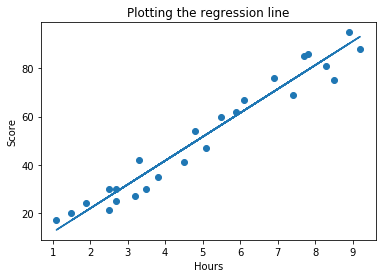

In [106]:
# Plotting the regression line
line = lr.coef_*x+lr.intercept_

plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Plotting the regression line')
plt.scatter(x, y)
plt.plot(x, line)
plt.show()